# Assignment 4

Question 1). a)

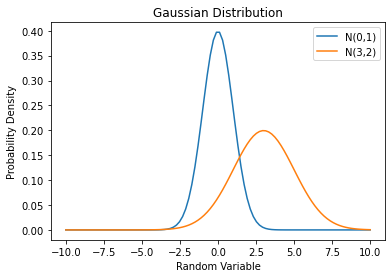

In [4]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt


#generte figure and axes
fig=plt.figure()
ax=fig.gca
#generate random number x
x=np.linspace(-10,10,100)
#calculate gaussian distribution and plot it
plt.plot(x,norm.pdf(x,0,1))
plt.plot(x,norm.pdf(x,3,2))
plt.ylabel("Probability Density")
plt.xlabel("Random Variable")
plt.title("Gaussian Distribution")
plt.legend(('N(0,1)', 'N(3,2)'))


There is difference in magnitude

This is because, both distribution differ in the "Spread", the standard deviation. 

Tha larger the stardard deviation, the lower the frequency magnitude(Probability Density) at the mean of the distribution


Question 1). b)

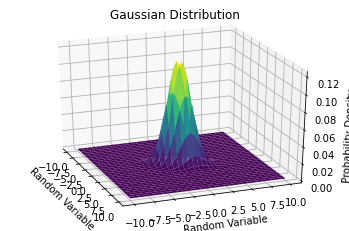

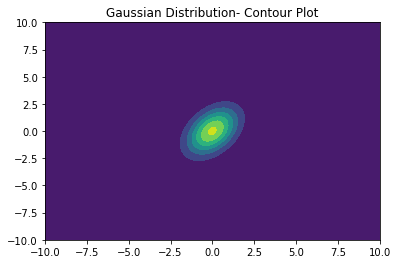

In [5]:

import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 2-dimensional distribution will be over variables X and Y
N = 100
X = np.linspace(-10, 10, N)
Y = np.linspace(-10, 10, N)
X, Y = np.meshgrid(X, Y)
# Mean vector and covariance matrix, given values
mu = np.array([0., 0.])
Sigma = np.array([[ 1. , 0.6], [0.6,  2]])
# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y
def multivariate_gaussian(pos, mu, Sigma):
    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X,Y
Z = multivariate_gaussian(pos, mu, Sigma)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax1 = fig.gca(projection='3d')
ax1.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True, cmap=cm.viridis)
ax1.view_init(27, -21)

ax1.set_zlabel("Probability Density")
ax1.set_xlabel("Random Variable")
ax1.set_ylabel("Random Variable")
ax1.set_title("Gaussian Distribution")


plt.show()

fig=plt.figure()
ax=fig.gca()
ax.contourf(X, Y, Z, cmap=cm.viridis)
ax.set_title("Gaussian Distribution- Contour Plot")
plt.show()

Question 2) Bayes Classifier IRIS dataset

In [8]:

import pandas as pnd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from numpy import random
import copy

#Load the dataset
data=pnd.read_csv(r"C:\Users\keyen\Downloads\iris.data", sep=',', names=["SepLen","SepWid","PetLen","PetWid","Species"])

#Training classes(Y=0,1,2) with class labels/ Arranging according to each class
class1=data.loc[data["Species"]=="Iris-setosa"]
class2=data.loc[data["Species"]=="Iris-versicolor"]
class3=data.loc[data["Species"]=="Iris-virginica"]

class2=class2.reset_index()
class2=class2.drop("index",axis=1)
class3=class3.reset_index()
class3=class3.drop("index",axis=1)



Dividing Testing and Training Data

In [9]:
#Test range 
#in decimals .7 => 70%
ntrainingdata=.7
ntestdata=.3

#Test indices
n=int(np.round(ntestdata*len(class1)))
#Random Sampling from Class1, Same indices are used for sampling from other classes
testind=class1.sample(n).index
testindlong=np.concatenate([testind,testind+50,testind+100])


#droping the labels and preparing variables
test1=class1.drop("Species",axis=1)
test2=class2.drop("Species",axis=1)
test3=class3.drop("Species",axis=1)
test1=test1.iloc[testind]
test2=test2.iloc[testind]
test3=test3.iloc[testind]
testdata=pnd.concat([test1,test2,test3])

#Dividing test and train data
trainclass1=class1.drop(testind,axis=0)
trainclass2=class2.drop(testind,axis=0)
trainclass3=class3.drop(testind,axis=0)
traindata=data.drop(testindlong,axis=0)

#test features
#feature1
#x1
feature1=testdata.SepLen

#feature2
#x2
feature2=testdata.SepWid

#feature3
#x3
feature3=testdata.PetLen

#feature4
#x4
feature4=testdata.PetWid

Classes and Features

In [10]:
#Prior Probability

In [11]:
#Prior Probability of each class Class
ndata=len(class1)+len(class2)+len(class3)
#Since they are equally likely prior(Class1)=prior(Class2)
prior=len(class1)/ndata

In [12]:
# Arrange according to class and features for learning
#Training Data

Class1

In [13]:
##Class1 
setosaX=trainclass1.SepLen
setosaY=trainclass1.SepWid
setosaZ=trainclass1.PetLen
setosaW=trainclass1.PetWid

#Feature Description
#x1
x1mu1=setosaX.mean()
x1sd1=setosaX.std()
#x2
x1mu2=setosaY.mean()
x1sd2=setosaY.std()
#x3
x1mu3=setosaZ.mean()
x1sd3=setosaZ.std()
#x4
x1mu4=setosaW.mean()
x1sd4=setosaW.std()


Class2

In [14]:
##Class2
versicolorX=trainclass2.SepLen
versicolorY=trainclass2.SepWid
versicolorZ=trainclass2.PetLen
versicolorW=trainclass2.PetWid

#feature vectors
#x1
x2mu1=versicolorX.mean()
x2sd1=versicolorX.std()
#x2
x2mu2=versicolorY.mean()
x2sd2=versicolorY.std()
#x3
x2mu3=versicolorZ.mean()
x2sd3=versicolorZ.std()
#x4
x2mu4=versicolorW.mean()
x2sd4=versicolorW.std()


Class 3

In [15]:
#Class3
#y3
virginicaX=trainclass3.SepLen
virginicaY=trainclass3.SepWid
virginicaZ=trainclass3.PetLen
virginicaW=trainclass3.PetWid

#feature vector
#x1
x3mu1=virginicaX.mean()
x3sd1=virginicaX.std()
#x2
x3mu2=virginicaY.mean()
x3sd2=virginicaY.std()
#x3
x3mu3=virginicaZ.mean()
x3sd3=virginicaZ.std()
#x4
x3mu4=virginicaW.mean()
x3sd4=virginicaW.std()


Test Data

In [16]:
#Test data
x=feature1.array
y=feature2.array
z=feature3.array
w=feature4.array

Calculation of Probabilities

In [17]:
#calculating the probabilities for class prediction
pclass1=[];pclass2=[];pclass3=[]

for i in range(0,len(x)):

#probability of features being in class 1 - Sentosa    
    pclass1.append(np.log(prior)+
                  np.log(norm.pdf(x[i],x1mu1,x1sd1))
                  +np.log(norm.pdf(y[i],x1mu2,x1sd2))
                  +np.log(norm.pdf(z[i],x1mu3,x1sd3))
                  +np.log(norm.pdf(w[i],x1mu4,x1sd4)))

#probability of features being in class 2 - Versicolor    
    pclass2.append(np.log(prior)
                  +np.log(norm.pdf(x[i],x2mu1,x2sd1))
                  +np.log(norm.pdf(y[i],x2mu2,x2sd2))
                  +np.log(norm.pdf(z[i],x2mu3,x2sd3))
                  +np.log(norm.pdf(w[i],x2mu4,x2sd4)))

#probability of features being in class 3 - Virginica        
    pclass3.append(np.log(prior)
                  +np.log(norm.pdf(x[i],x3mu1,x3sd1))
                  +np.log(norm.pdf(y[i],x3mu2,x3sd2))
                  +np.log(norm.pdf(z[i],x3mu3,x2sd3))
                  +np.log(norm.pdf(w[i],x3mu4,x3sd4)))


Decision

In [18]:

#decision
#based on highest probability
inds=[]
for i in range(0,len(x)):
    px=np.array([pclass1[i],pclass2[i],pclass3[i]])
    inds.append(np.argmax(px))
    px=[]


Identification of Error prediction

In [19]:


# Identifying error trials    
eror=0
original=[]
prediction=[]
erorind=np.zeros((len(testdata)))

for i in range(len(pclass1)):
    if data.iloc[testindlong[i]].Species=="Iris-setosa":
        original.append(0)
        prediction.append(inds[i]) 
    if data.iloc[testindlong[i]].Species=="Iris-versicolor":
        original.append(1)
        prediction.append(inds[i])     
    if data.iloc[testindlong[i]].Species=="Iris-virginica":
        original.append(2)
        prediction.append(inds[i]) 
   
    if inds[i]==0:
        print("The predicted class  is class Setosa")
        if data.iloc[testindlong[i]].Species!='Iris-setosa':
            print("False Positive")
            eror+=1   
            erorind[i]=1
    elif inds[i]==1:
        print("The predicted class is class versicolor")
        if data.iloc[testindlong[i]].Species!='Iris-versicolor':
            print("False Positive")
            eror+=1
            erorind[i]=1
    elif inds[i]==2:
        print("The predicted class is class virginica")
        if data.iloc[testindlong[i]].Species!='Iris-virginica':
            print("False Positive")
            eror+=1
            erorind[i]=1

print("N0. of errors = " + str(eror))


originSpecies=[]
for i in range(len(pclass1)):
    if data.iloc[testindlong[i]].Species=="Iris-setosa":
        originSpecies.append("Iris-setosa - %d" %i)
    if data.iloc[testindlong[i]].Species=="Iris-versicolor":
      
        originSpecies.append("Iris-versicolor - %d" %i)
    if data.iloc[testindlong[i]].Species=="Iris-virginica":
        originSpecies.append("Iris-virginica - %d" %i)

resultdata=copy.copy(testdata)
resultdata["Actual"]=original
resultdata["Prediction"]=prediction
resultdata["PredictSpecies"]=originSpecies
resultdata["Error"]=erorind


The predicted class  is class Setosa
The predicted class  is class Setosa
The predicted class  is class Setosa
The predicted class  is class Setosa
The predicted class  is class Setosa
The predicted class  is class Setosa
The predicted class  is class Setosa
The predicted class  is class Setosa
The predicted class  is class Setosa
The predicted class  is class Setosa
The predicted class  is class Setosa
The predicted class  is class Setosa
The predicted class  is class Setosa
The predicted class  is class Setosa
The predicted class  is class Setosa
The predicted class is class versicolor
The predicted class is class versicolor
The predicted class is class versicolor
The predicted class is class versicolor
The predicted class is class versicolor
The predicted class is class versicolor
The predicted class is class versicolor
The predicted class is class versicolor
The predicted class is class versicolor
The predicted class is class virginica
False Positive
The predicted class is class ve

Figures

Distribution of features SepLen and PetLen

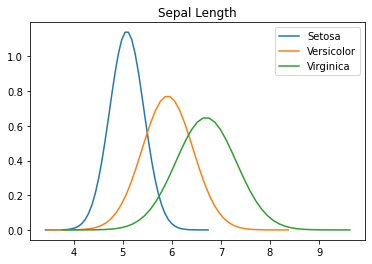

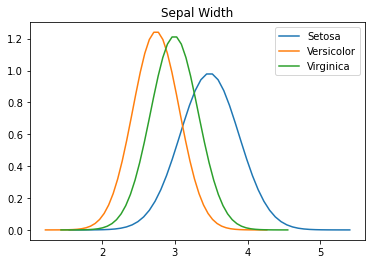

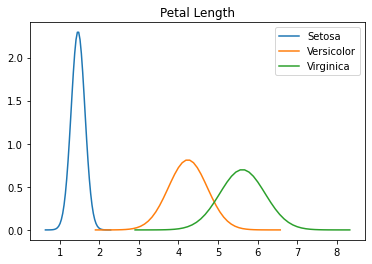

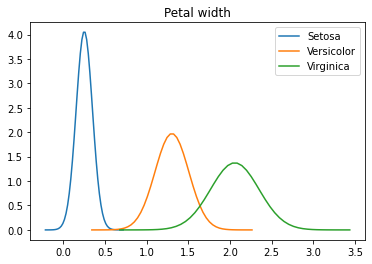

In [20]:

###Figures

def gaussdist(mean,std,n):
    c1=norm.ppf(0.000001,mean,std)
    d1=norm.ppf(0.999999,mean,std)
    FeatureLength1 = np.linspace(c1,d1,n)
    plt.plot(FeatureLength1,norm.pdf(FeatureLength1,mean,std))

#SepLen
plt.figure()
gaussdist(x1mu1,x1sd1,50)
gaussdist(x2mu1,x2sd1,50)
gaussdist(x3mu1,x3sd1,50)
plt.legend(('Setosa','Versicolor', 'Virginica'))
plt.title("Sepal Length")
plt.show()

#sepwid
plt.figure()
gaussdist(x1mu2,x1sd2,50)
gaussdist(x2mu2,x2sd2,50)
gaussdist(x3mu2,x3sd2,50)
plt.legend(('Setosa','Versicolor', 'Virginica'))
plt.title("Sepal Width")
plt.show()

#petLen
plt.figure()
gaussdist(x1mu3,x1sd3,50)
gaussdist(x2mu3,x2sd3,50)
gaussdist(x3mu3,x3sd3,50)
plt.legend(('Setosa','Versicolor', 'Virginica'))
plt.title("Petal Length")
plt.show()
#petWid
plt.figure()
gaussdist(x1mu4,x1sd4,50)
gaussdist(x2mu4,x2sd4,50)
gaussdist(x3mu4,x3sd4,50)
plt.legend(('Setosa','Versicolor', 'Virginica'))
plt.title("Petal width")
plt.show()


Classification

<Figure size 432x288 with 0 Axes>

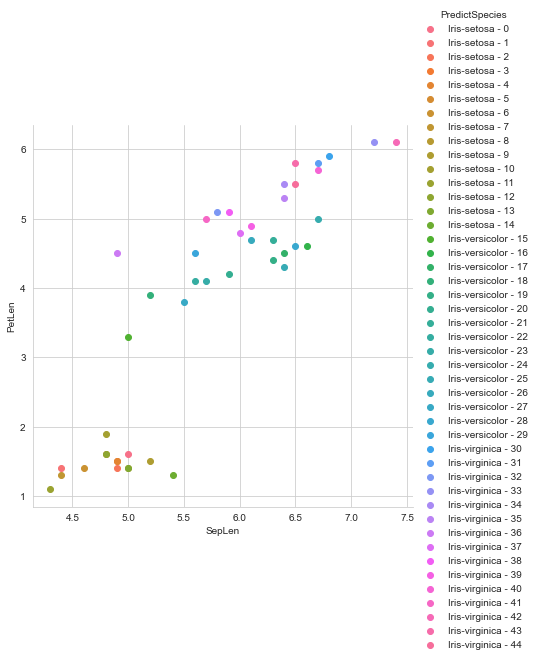

In [21]:
fig=plt.figure()
sb.set_style("whitegrid") 
sb.FacetGrid(resultdata, hue = "PredictSpecies",height = 6).map(plt.scatter,'SepLen','PetLen').add_legend()

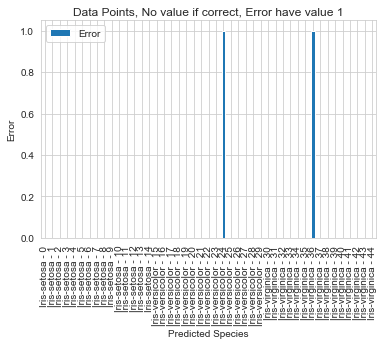

In [22]:
s=resultdata.plot.bar(x='PredictSpecies',y='Error')
s.set_xlabel('Predicted Species')
s.set_ylabel("Error")
s.set_title("Data Points, No value if correct, Error have value 1")
plt.show()

Box plot of error
wherever error occured is marked as a 1

others have no value=0